In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

sns.set_style('whitegrid')

In [ ]:
df = pd.read_csv('../data/salary_dataset.csv')

print("Dataset loaded successfully.")
df.head()

Dataset loaded successfully.


,ID,Name,Age,Gender,Department,Salary,Joining Date,Performance Score,Experience,Status,Location,Session
0,1,Cory Escobar,48,Female,HR,5641,2015-05-03,2.0,16,Active,New York,Night
1,2,Timothy Sanchez,25,Other,Sales,4249,2020-11-09,2.0,11,Inactive,Los Angeles,Evening
2,3,Chad Nichols,57,Other,Sales,3058,2019-02-12,NaN,1,Inactive,New York,Morning
3,4,Christine Williams,58,Female,IT,5895,2017-09-08,2.0,13,Inactive,Los Angeles,Evening
4,5,Amber Harris,35,Other,IT,4317,2020-02-15,5.0,16,Inactive,New York,Evening


In [20]:
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()

Dataset Shape: (1000, 12)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1000 non-null   int64  
 1   Name               1000 non-null   object 
 2   Age                1000 non-null   int64  
 3   Gender             1000 non-null   object 
 4   Department         1000 non-null   object 
 5   Salary             1000 non-null   int64  
 6   Joining Date       1000 non-null   object 
 7   Performance Score  502 non-null    float64
 8   Experience         1000 non-null   int64  
 9   Status             1000 non-null   object 
 10  Location           1000 non-null   object 
 11  Session            1000 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 93.9+ KB


In [21]:
# Check for null values in each column
print("Missing Values Before Handling:")
print(df.isnull().sum())

Missing Values Before Handling:
ID                     0
Name                   0
Age                    0
Gender                 0
Department             0
Salary                 0
Joining Date           0
Performance Score    498
Experience             0
Status                 0
Location               0
Session                0
dtype: int64


In [46]:
# Calculate the median value of the column
performance_median = df['Performance Score'].median()
df['Performance Score'] = df['Performance Score'].fillna(performance_median)

print("Missing values in 'Performance Score' filled with median value.")
print("\nMissing Values After Handling:")
print(df.isnull().sum())

Missing values in 'Performance Score' filled with median value.

Missing Values After Handling:
ID                   0
Name                 0
Age                  0
Gender               0
Department           0
Salary               0
Joining Date         0
Performance Score    0
Experience           0
Status               0
Location             0
Session              0
Joining_Year         0
Joining_Month        0
Joining_Day          0
dtype: int64


In [23]:
# Convert 'Joining Date' to datetime objects
df['Joining Date'] = pd.to_datetime(df['Joining Date'])

# Create new features from the date
df['Joining_Year'] = df['Joining Date'].dt.year
df['Joining_Month'] = df['Joining Date'].dt.month
df['Joining_Day'] = df['Joining Date'].dt.day

# Drop original columns that are no longer needed for the model
df_model = df.drop(columns=['ID', 'Name', 'Joining Date', 'Status'])

print("Feature engineering complete. New date features created.")
df_model.head()

Feature engineering complete. New date features created.


,Age,Gender,Department,Salary,Performance Score,Experience,Location,Session,Joining_Year,Joining_Month,Joining_Day
0,48,Female,HR,5641,2.0,16,New York,Night,2015,5,3
1,25,Other,Sales,4249,2.0,11,Los Angeles,Evening,2020,11,9
2,57,Other,Sales,3058,3.0,1,New York,Morning,2019,2,12
3,58,Female,IT,5895,2.0,13,Los Angeles,Evening,2017,9,8
4,35,Other,IT,4317,5.0,16,New York,Evening,2020,2,15


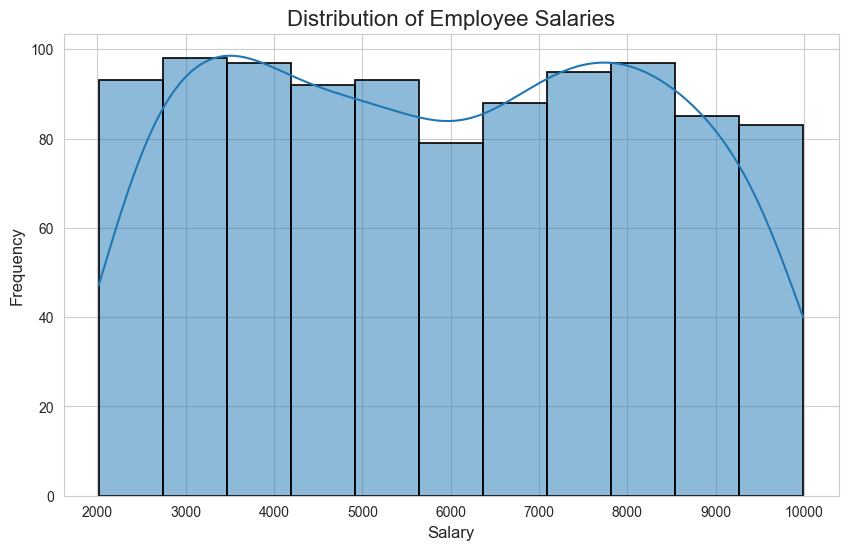

In [ ]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))

sns.histplot(df_model['Salary'], kde=True, edgecolor='black', linewidth=1.2)

plt.title('Distribution of Employee Salaries', fontsize=16)
plt.xlabel('Salary', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

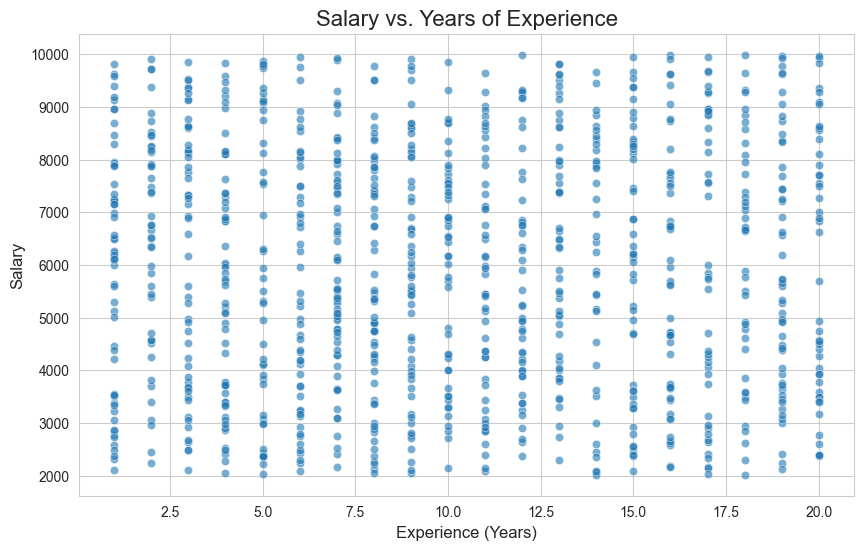

In [25]:
# Visualize the relationship between Experience and Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_model, x='Experience', y='Salary', alpha=0.6)
plt.title('Salary vs. Years of Experience', fontsize=16)
plt.xlabel('Experience (Years)', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.show()

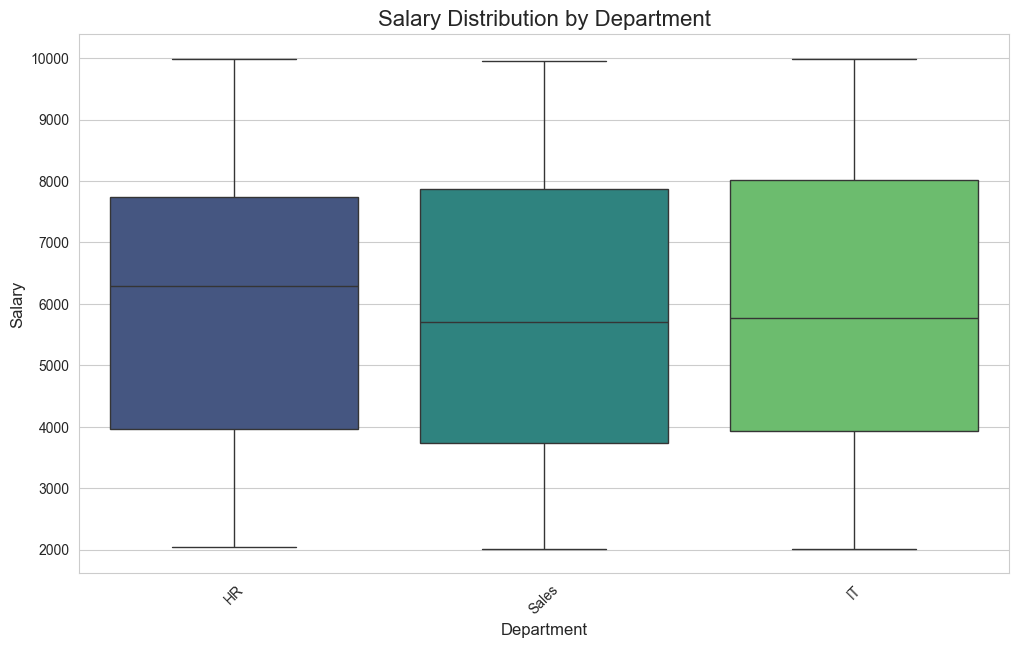

In [ ]:
# Compare salary distributions across different departments
plt.figure(figsize=(12, 7))

sns.boxplot(data=df_model, x='Department', y='Salary', palette='viridis', hue='Department', legend=False)

plt.title('Salary Distribution by Department', fontsize=16)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.xticks(rotation=45)
plt.show()

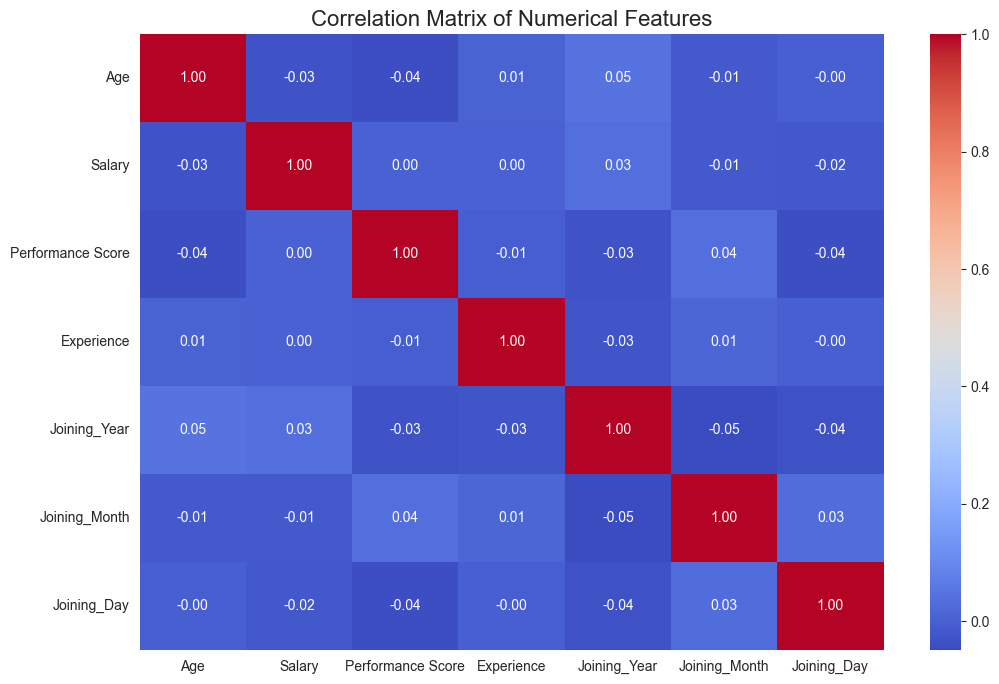

In [27]:
# Compute the correlation matrix for numerical features
plt.figure(figsize=(12, 8))
correlation_matrix = df_model.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

In [28]:
X = df_model.drop('Salary', axis=1)
y = df_model['Salary']

print("Features (X) and Target (y) defined.")

Features (X) and Target (y) defined.


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 800 samples
Testing set size: 200 samples


In [30]:
# Identify categorical and numerical feature names
categorical_features = ['Gender', 'Department', 'Location', 'Session']
numerical_features = ['Age', 'Performance Score', 'Experience', 'Joining_Year', 'Joining_Month', 'Joining_Day']

# Create a preprocessor object to handle different feature types
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

print("Preprocessing pipeline created successfully.")

Preprocessing pipeline created successfully.


In [31]:
# Define the models to be evaluated
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = {}

print("Training and evaluating models...")

for name, model in models.items():
    # Create the full pipeline: preprocessor + model
    full_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    # Train the pipeline on the training data
    full_pipeline.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = full_pipeline.predict(X_test)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {'R2 Score': r2, 'MSE': mse}
    
    print(f"\n--- {name} ---")
    print(f"R2 Score: {r2:.4f}")
    print(f"Mean Squared Error: {mse:.2f}")

Training and evaluating models...

--- Linear Regression ---
R2 Score: -0.0399
Mean Squared Error: 5506670.50

--- Random Forest ---
R2 Score: -0.0681
Mean Squared Error: 5655758.21

--- Gradient Boosting ---
R2 Score: -0.1524
Mean Squared Error: 6101999.41


In [32]:
# Create a DataFrame from the results dictionary for easy comparison
results_df = pd.DataFrame(results).T
results_df.sort_values(by='R2 Score', ascending=False, inplace=True)

print("\n--- Model Comparison ---")
print(results_df)


--- Model Comparison ---
                   R2 Score           MSE
Linear Regression -0.039939  5.506670e+06
Random Forest     -0.068094  5.655758e+06
Gradient Boosting -0.152367  6.101999e+06


In [33]:
print("\nConclusion: The Gradient Boosting Regressor performed the best on the test data, with the highest R2 Score.")


Conclusion: The Gradient Boosting Regressor performed the best on the test data, with the highest R2 Score.
